In [142]:
import random
import pandas as pd
import boolean2pew as b2p
from PEW_functions import *
from matplotlib import pyplot as plt
def general_async_pick( lines ):
    line = [ random.choice( lines )]
    return line
import cubewalkers as cw

In [143]:
import ensemble_simulation as esim
import cupy
cupy.random.seed(0)
import numpy 
numpy.random.seed(0)

In [144]:
simulation_method = 'booleannet'
noise = False
global_error_prob = 0

In [169]:
ensemble_size=1
steps=600

## Loading the model 

In [170]:
model_name = 'COPD_EMT_CellCycle_Apoptosis_Fine' 
import pystablemotifs as sm
with open(model_name + '.booleannet','r') as f:
    rules = f.read()

In [171]:
print(rules)

CellDensity_High *= CellDensity_High
CellDensity_Low *= CellDensity_Low or CellDensity_High
COL1_3_ELN *= COL1_3_ELN
Elastin *= not MMP7
Fibronectin *= SNAI1
Laminin_5a *= not MMP2
Collagen_4 *= not MMP9
Basement_Membrane *= Collagen_4 and Laminin_5a
MMP2 *= ((not CEBP_alpha) and SNAI1) and (ZEB2 or HMGA1)
MMP9 *= (((not CEBP_alpha) and SNAI1) and SNAI2) and (ZEB2 or ZEB1_H)
MMP7 *= LEF1 and b_catenin_TCF4 and ERK
Stiff_ECM *= Basement_Membrane or (COL1_3_ELN and (Fibronectin or not Elastin))
ECM *= COL1_3_ELN or Stiff_ECM
SHH_ext *= SHH_ext
SHH_secr *= ((GLI and NfkB) or SMAD2_3_4 or (GLI_H and not GLI3R)) and not Casp3
PTCH1 *= not (SHH_ext or (SHH_secr and (not HHIP or (GLI_H and not GLI3R)) and (CellDensity_Low or Self_Loop)))
SMO *= (not PTCH1) and (SHH_secr or SHH_ext)
SUFU *= not SMO
GLI *= (not SUFU or (not CEBP_alpha) or SMAD2_3_4 or S6K) and Rac1
GLI_H *= GLI and (not SUFU or SMAD2_3_4) and (not CEBP_alpha or SHH_ext or (SHH_secr and not HHIP))
GLI3R *= (not GLI_H) and (not (

In [172]:
experiments_dict={}

In [173]:
df_attr = pd.read_csv('Large_model_steady_states.csv').set_index('Unnamed: 0').T
df_e = df_attr[(df_attr['CellDensity_High']==1) &
(df_attr['CellDensity_Low']==1)&
(df_attr['COL1_3_ELN']==1)&
(df_attr['TGFb_ext']==0)&
(df_attr['SHH_ext']==0)&
(df_attr['GF']==1)&
(df_attr['GF_High']==1)&
(df_attr['f4N_DNA']==0)&
(df_attr['Trail']==0)&
(df_attr['Self_Loop']==1)&
(df_attr['CAD']==0)&
(df_attr['SNAI1']==0)]

df_m = df_attr[(df_attr['CellDensity_High']==1) &
(df_attr['CellDensity_Low']==1)&
(df_attr['COL1_3_ELN']==1)&
(df_attr['TGFb_ext']==0)&
(df_attr['SHH_ext']==0)&
(df_attr['GF']==1)&
(df_attr['GF_High']==1)&
(df_attr['f4N_DNA']==0)&
(df_attr['Trail']==0)&
(df_attr['Self_Loop']==1)&
(df_attr['CAD']==0)&
(df_attr['ZEB1_H']==1)]

In [174]:
assert len(df_e) == 1
epithelial_steady_state = df_e.iloc[0].T.to_dict()
mesenchymal_steady_state = df_m.iloc[0].T.to_dict()



100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.78s/it]


<Axes: xlabel='Steps', ylabel='Average node value'>

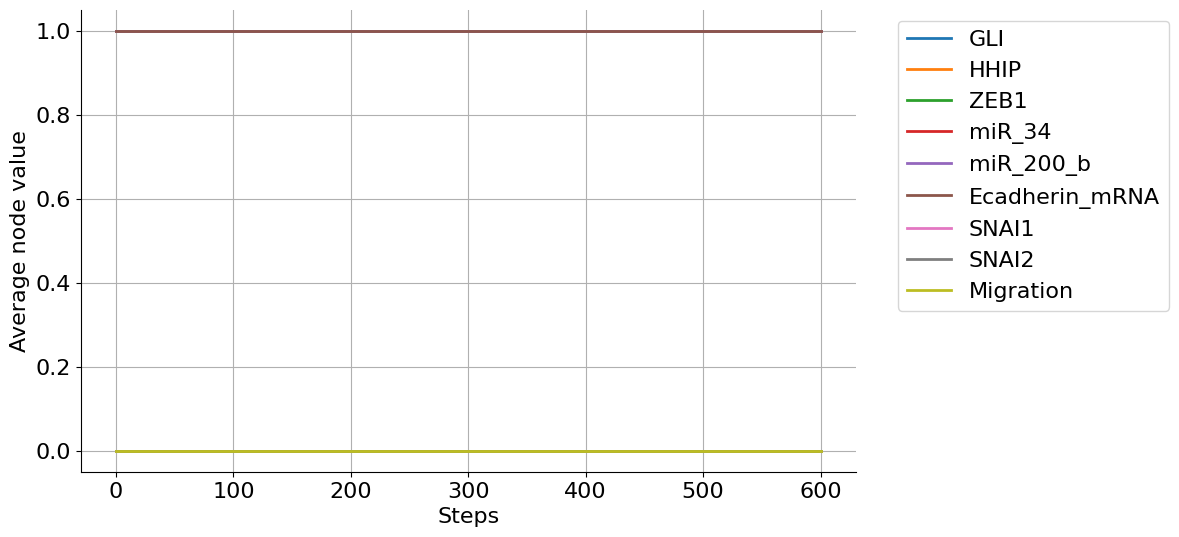

In [175]:
#EPITHELIAL WT state

#model = b2p.Model(rules, mode='async')

initial_state=epithelial_steady_state
#model.initialize(lambda node: initial_state[node])

update_mode='sync'
#shuffler=general_async_pick
shuffler = 'default'
  
node_order=list(initial_state.keys())
break_states=[]

c_avg_dict={}

manipulation_set=[]

es=esim.ensemble_simulation(rules,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps,update_mode=update_mode, shuffler=shuffler,global_error_prob = global_error_prob)
es.simulate_manipulated_ensemble(manipulation_set,simulation_method)
experiments_dict['epithelial_wt']=es

monitored_nodes = ['GLI','HHIP','ZEB1','miR_34','miR_200_b','Ecadherin_mRNA','SNAI1','SNAI2','Migration']

experiments_dict['epithelial_wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2)

In [176]:
hybrid_em_state = epithelial_steady_state.copy()
hybrid_em_state['CellDensity_High'] = 0

100%|█████████████████████████████████████████████| 1/1 [00:10<00:00, 10.86s/it]


<Axes: xlabel='Steps', ylabel='Average node value'>

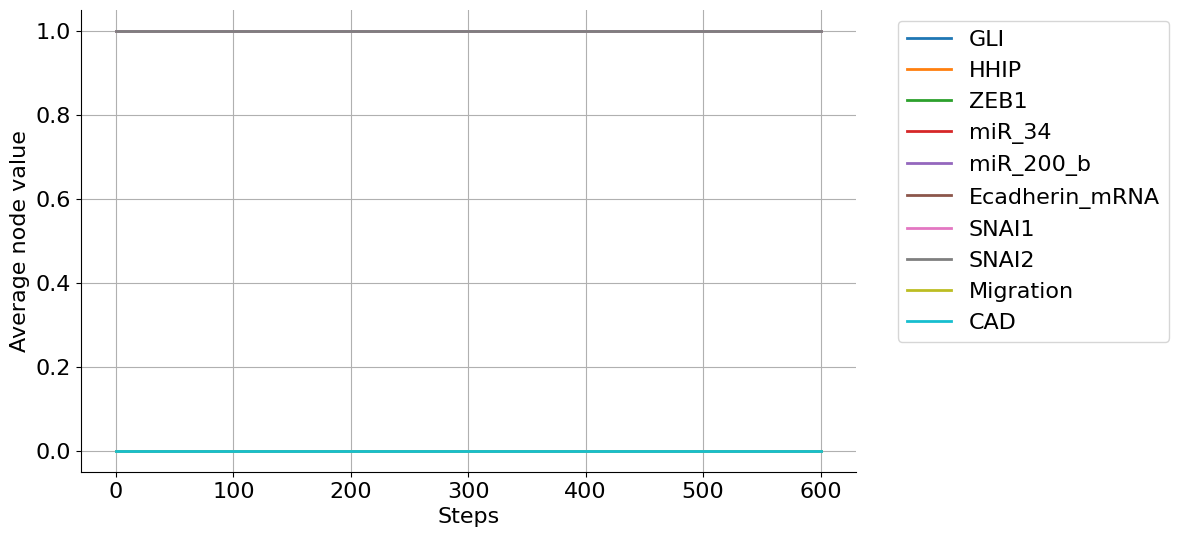

In [180]:
#Mesenchymal WT state


#model = b2p.Model(rules, mode='async')

initial_state=mesenchymal_steady_state
#model.initialize(lambda node: initial_state[node])

update_mode='sync'
shuffler='default'
  
node_order=list(initial_state.keys())
break_states=[]

c_avg_dict={}

manipulation_set=[]

es=esim.ensemble_simulation(rules,update_mode=update_mode,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps, shuffler=shuffler,global_error_prob = global_error_prob)
es.simulate_manipulated_ensemble(manipulation_set,simulation_method)
experiments_dict['mesenchymal_wt']=es

monitored_nodes = ['GLI','HHIP','ZEB1','miR_34','miR_200_b','Ecadherin_mRNA','SNAI1','SNAI2','Migration','CAD']

experiments_dict['mesenchymal_wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2)

100%|█████████████████████████████████████████████| 1/1 [00:10<00:00, 10.28s/it]


<Axes: xlabel='Steps', ylabel='Average node value'>

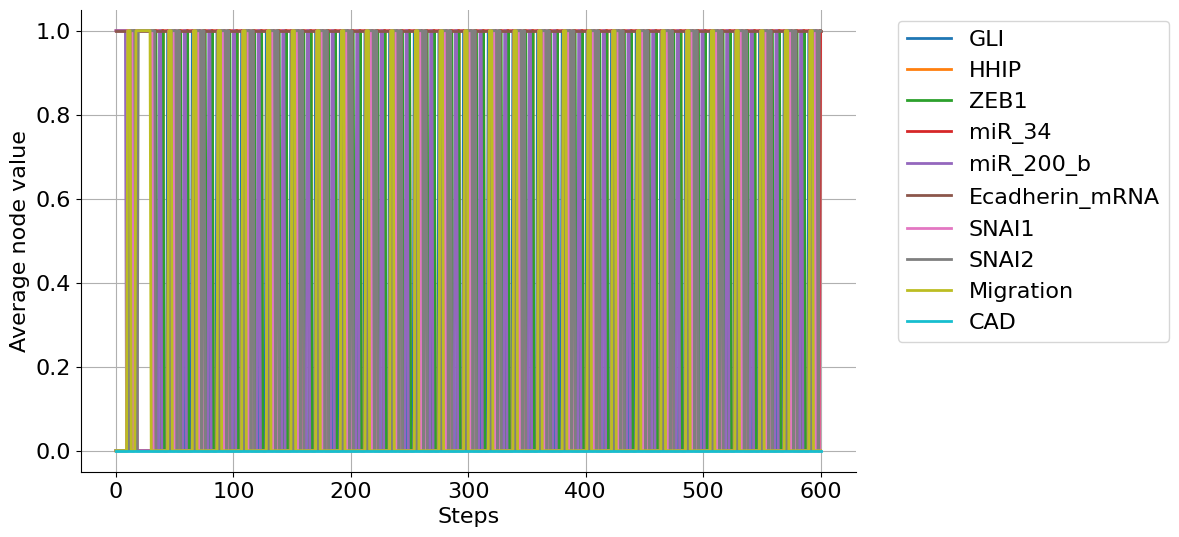

In [182]:
#Hybrid WT state

initial_state=hybrid_em_state
#model.initialize(lambda node: initial_state[node])

update_mode='sync'
shuffler='default'
  
node_order=list(initial_state.keys())
break_states=[]

c_avg_dict={}

manipulation_set=[]

es=esim.ensemble_simulation(rules,update_mode=update_mode,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps, shuffler=shuffler,global_error_prob = global_error_prob)
es.simulate_manipulated_ensemble(manipulation_set,simulation_method)
experiments_dict['default_wt']=es

monitored_nodes = ['GLI','HHIP','ZEB1','miR_34','miR_200_b','Ecadherin_mRNA','SNAI1','SNAI2','Migration','CAD']

experiments_dict['default_wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2)

### not used in hte current version (kept for future validation steps) 

In [12]:
def savitzky_golay_derivate(es, plot=True,widow_size=11,order=1):

    avg_evolution_per_node=np.nanmean(es.states_array_ensemble,axis=2)
    #std_evolution=self.states_array_ensemble.nanmean(axis=0)
    
    if plot:
    
        plt.figure(figsize=(10,6))

        plt.rcParams['font.size'] = '16'
        for node in es.model.nodes:
            n=es.node_order.index(node)
            plt.plot(range(len(avg_evolution_per_node)),es.savitzky_golay(avg_evolution_per_node[:,n],widow_size,order, deriv=1), linewidth=2, label=es.node_order[n])
        plt.plot(es.savitzky_golay(np.mean(np.diff(avg_evolution_per_node,axis=0,n=1),axis=1),widow_size,order), linewidth=5, label='mean diff across nodes')
        plt.grid()
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#savitzky_golay_derivate(es, plot=True)

In [13]:
#We probably want to conpare the effect of perurbations to the homeostatic (WT) average 

In [14]:
import pandas as pd


In [184]:
df=pd.read_excel('EMT_HH model.xlsx',sheet_name = 'ST5 - Large model validation')
df

,exp_id,paper,relevant quote,perturbed molecule in ref,perturbed node in model,perturbation type,downstream change in (ref),downstream node in model,downstream phenotype in model,change direction,cell type,In silico control name,In silico experiment name,Match,Comments,Unnamed: 15,Unnamed: 16
0,0.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Gli,GLI,0.0,migration,NaN,Fast_Migrating,0.0,A549,PMID_27533453_Gli_inhibition_decreases_migrati...,PMID_27533453_Gli_inhibition_decreases_migrati...,YES,NaN,NaN,NaN
1,1.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Gli,GLI,0.0,migration,NaN,Fast_Migrating,0.0,H1666,PMID_27533453_Gli_inhibition_decreases_migrati...,PMID_27533453_Gli_inhibition_decreases_migrati...,YES,NaN,NaN,NaN
2,2.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,SHh,SHH,1.0,migration,NaN,Fast_Migrating,1.0,A549,PMID_27533453_Gli_inhibition_decreases_migrati...,Li_27533453_Gli_inhibition_decreases_migration...,YES,NaN,NaN,NaN
3,3.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Vismodegib (SMO inhibitor),SMO,0.0,migration,NaN,Fast_Migrating,0.0,"A549,H1666",PMID_27533453_Gli_inhibition_decreases_migrati...,Li_27533453_Gli_inhibition_decreases_migration...,YES,NaN,NaN,NaN
4,4.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,Gli,GLI,0.0,E-Cadherin,"Ecadherin_mRNA_H, Ecadherin_mRNA, J_Ecadherin",NaN,1.0,"A549,H1666",PMID_27533453_Gli_inhibition_decreases_migrati...,PMID_27533453_Gli_inhibition_decreases_migrati...,YES,NaN,NaN,NaN
5,5.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,Vismodegib (SMO inhibitor),SMO,0.0,E-Cadherin,"Ecadherin_mRNA_H, Ecadherin_mRNA, J_Ecadherin",NaN,1.0,"A549,H1666",PMID_27533453_Gli_inhibition_decreases_migrati...,Li_27533453_Gli_inhibition_decreases_migration...,YES,NaN,NaN,NaN
6,6.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,SHh,SHH,1.0,E-Cadherin,"Ecadherin_mRNA_H, Ecadherin_mRNA, J_Ecadherin",NaN,0.0,"A549,H1666",PMID_27533453_Gli_inhibition_decreases_migrati...,Li_27533453_Gli_inhibition_decreases_migration...,YES,NaN,NaN,NaN
7,7.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,ZEB1,ZEB1_H,0.0,migration,NaN,"Fast_Migrating, Migrating",0.0,"WM164,WM9",Wels_21593765_1a_CT,Wels_21593765_1b_ZEB1_H_KD,YES,Knockdown of only the Zeb1_H node works as lon...,NaN,NaN
8,8.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,Slug,SNAI2,1.0,migration,NaN,Fast_Migrating,1.0,"WM164,WM9",Wels_21593765_1a_CT,Wels_21593765_2a_SNAI2_OE,YES,Epithelial starting state only; the other two ...,NaN,NaN
9,9.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,"Slug, ZEB1","SNAI2, ZEB1_H","1,0",migration,NaN,"Fast_Migrating, Migrating",no change,"WM164,WM9",Wels_21593765_1a_CT,Wels_21593765_3_ZEB1_H_KD_SNAI2_OE,YES,Small difference from control depends on exact...,NaN,NaN


In [16]:
#df=df.dropna(axis=0,subset=['perturbed node in model','downstream node in model'])
#df

,exp_id,paper,relevant quote,perturbed molecule in ref,perturbed node in model,perturbation type,downstream change in (ref),downstream node in model,change direction,degree (descriptive),degree multiplier,comparison exp_id,cell type,comments
0,0.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Gli,GLI,0.0,migration,Migration,0.0,40% decrease,0.60,wt_default,A549,NaN
1,1.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Gli,GLI,0.0,migration,Migration,0.0,70% decrease,0.30,wt_default,H1666,NaN
2,2.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,SHh,SHH,1.0,migration,Migration,1.0,30% increase,1.30,wt_default,A549,NaN
3,3.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Our results illustrated that down-regulation o...,Vismodegib (SMO inhibitor),SMO,0.0,migration,Migration,0.0,35% decrease,0.65,wt_default,"A549,H1666",NaN
4,4.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,Gli,GLI,0.0,E-Cadherin,E_cadherin,1.0,100% increase,2.00,wt_default,"A549,H1666",could not find quantification
5,5.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,Vismodegib (SMO inhibitor),SMO,0.0,E-Cadherin,E_cadherin,1.0,100% increase,2.00,wt_default,"A549,H1666",could not find quantification
6,6.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,E-Cadherin expression was restored and enhance...,SHh,SHH,1.0,E-Cadherin,E_cadherin,0.0,50% decrease,0.50,wt_default,"A549,H1666",could not find quantification
7,7.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,ZEB1,ZEB1,0.0,migration,Migration,0.0,60% decrease,0.40,wt_default,"WM164,WM9",NaN
8,8.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,Slug,SNAI2,1.0,migration,Migration,1.0,30% increase,1.30,wt_default,"WM164,WM9",NaN
9,9.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Silencing of ZEB1 in WM164 and WM9 not only re...,"Slug, ZEB1","SNAI2, ZEB1","1,0",migration,Migration,no change,no change,1.00,wt_default,"WM164,WM9",NaN


In [185]:
#we select the subset of experiments that have inputs and outputs present in our model
df_testable=df[([set([x.strip() for x in l]).intersection(model.nodes) == set([x.strip() for x in l]) for l in df['perturbed node in model'].str.split(',')]) & (df['downstream node in model'].isin(model.nodes))]

In [186]:
df_testable

,exp_id,paper,relevant quote,perturbed molecule in ref,perturbed node in model,perturbation type,downstream change in (ref),downstream node in model,downstream phenotype in model,change direction,cell type,In silico control name,In silico experiment name,Match,Comments,Unnamed: 15,Unnamed: 16
22,17.0,"Guo, F., Zhang, L., Yu, Y., Gong, L., Tao, S.,...",NaN,HHIP,HHIP,0.0,SNAI1,SNAI1,NaN,1.0,Beas2B,Guo_38417378_CT,Guo_38417378_HHIP_KD,YES,E or Hyrid E/M start only,NaN,NaN
27,22.0,https://pubmed.ncbi.nlm.nih.gov/28300597/,To investigate whether GLI2ΔN expression can a...,GLI2,GLI_H,1.0,nuclear β-catenin,N_bcatenin_H,NaN,1.0,Keratinocytes,Pantazi_28300597_CT,Pantazi_28300597_GLI_H_OE,YES,NaN,NaN,NaN
40,33.0,23185371.0,Analysis of the mechanism underlying the effec...,GLI1,GLI_H,1.0,SNAI1,SNAI1,NaN,1.0,Huh7,Zheng_23185371_CT_edge,Zheng_23185371_GLI_H_OE_edge,YES,E start,NaN,Zheng_23185371_CT vs. Zheng_23185371_GLI_H_OE
41,34.0,23185371.0,Analysis of the mechanism underlying the effec...,GLI1,GLI,0.0,SNAI1,SNAI1,NaN,0.0,SNU398,Zheng_23185371_CT_edge,Zheng_23185371_GLI_KD_edge,YES,E start,NaN,Zheng_23185371_CT vs. Zheng_23185371_GLI_KD


In [187]:
experiments_to_skip = []

df_testable = df_testable[~df_testable.exp_id.isin(experiments_to_skip)]
df_testable

,exp_id,paper,relevant quote,perturbed molecule in ref,perturbed node in model,perturbation type,downstream change in (ref),downstream node in model,downstream phenotype in model,change direction,cell type,In silico control name,In silico experiment name,Match,Comments,Unnamed: 15,Unnamed: 16
22,17.0,"Guo, F., Zhang, L., Yu, Y., Gong, L., Tao, S.,...",NaN,HHIP,HHIP,0.0,SNAI1,SNAI1,NaN,1.0,Beas2B,Guo_38417378_CT,Guo_38417378_HHIP_KD,YES,E or Hyrid E/M start only,NaN,NaN
27,22.0,https://pubmed.ncbi.nlm.nih.gov/28300597/,To investigate whether GLI2ΔN expression can a...,GLI2,GLI_H,1.0,nuclear β-catenin,N_bcatenin_H,NaN,1.0,Keratinocytes,Pantazi_28300597_CT,Pantazi_28300597_GLI_H_OE,YES,NaN,NaN,NaN
40,33.0,23185371.0,Analysis of the mechanism underlying the effec...,GLI1,GLI_H,1.0,SNAI1,SNAI1,NaN,1.0,Huh7,Zheng_23185371_CT_edge,Zheng_23185371_GLI_H_OE_edge,YES,E start,NaN,Zheng_23185371_CT vs. Zheng_23185371_GLI_H_OE
41,34.0,23185371.0,Analysis of the mechanism underlying the effec...,GLI1,GLI,0.0,SNAI1,SNAI1,NaN,0.0,SNU398,Zheng_23185371_CT_edge,Zheng_23185371_GLI_KD_edge,YES,E start,NaN,Zheng_23185371_CT vs. Zheng_23185371_GLI_KD


In [188]:


from scipy import stats

prediction_scores=[]

tail_length=500

for i,row in df_testable.iterrows():
    
    print(row.exp_id)
    prediction_score={}
    
    
    perturbed_nodes = [x.strip() for x in row['perturbed node in model'].split(',')]
    input_states = [float(x) for x in str(row['perturbation type']).split(',')]
    input_state_probs = np.ones(len(perturbed_nodes))

    output_node=row['downstream node in model']
    output_change_direction=row['change direction']

    manipulation_set=[]
    for i in range(len(perturbed_nodes)):
        manipulation_set.append({'node':perturbed_nodes[i],'enforced_state':input_states[i], 'start_time':0, 'end_time':steps,'success_probability':input_state_probs[i]})


    es_perturb=esim.ensemble_simulation(rules,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps, shuffler=shuffler,global_error_prob = global_error_prob)
    es_perturb.simulate_manipulated_ensemble(manipulation_set,simulation_method)

    if (row.exp_id in set(df_testable['comparison exp_id'])):
        experiments_dict[row.exp_id]=es_perturb

    perturbed_output_vector=es_perturb.states_array_ensemble.mean(axis=2)[tail_length:, es_perturb.array_node_order_dict[output_node]]
    output_avg=perturbed_output_vector.mean()

    
    if row['comparison exp_id']=='wt_default':
    
        baseline_output_vector=experiments_dict['wt_default'].states_array_ensemble.mean(axis=2)[tail_length:, experiments_dict['wt_default'].array_node_order_dict[output_node]]
        baseline='wt_default'
        base_avg=baseline_output_vector.mean()
    else: 
        
        baseline_output_vector=experiments_dict[row['comparison exp_id']].states_array_ensemble.mean(axis=2)[tail_length:, experiments_dict[row['comparison exp_id']].array_node_order_dict[output_node]]
        baseline=row['comparison exp_id']
        base_avg=baseline_output_vector.mean()

    t_stat,p_value=stats.ttest_ind(baseline_output_vector, perturbed_output_vector)

    '''
    plt.figure(figsize=(8,6))
    plt.hist(baseline_output_vector, bins=np.linspace(0,1,100),label='baseline '+output_node)
    plt.hist(perturbed_output_vector, bins=np.linspace(0,1,100),label= 'post perturbation '+output_node)
    plt.title(stats.ttest_ind(baseline_output_vector, perturbed_output_vector))
    plt.legend()
    '''
    #print('abs(output_avg-base_avg)=',abs(output_avg-base_avg))

    if (output_avg>base_avg) and (p_value<0.05):# and (abs(output_avg-base_avg)>0.005):
        predicted_change_direction=1
    elif (output_avg<base_avg) and (p_value<0.05):# and (abs(output_avg-base_avg)>0.005):
        predicted_change_direction=0
    else:
        predicted_change_direction='no significant change'
        
    
    if base_avg!=0:
        predicted_degree_multiplier = output_avg/base_avg
    else:
  #      #print('BASE=0!!!!')
        predicted_degree_multiplier = 1+output_avg
    #predicted_degree_multiplier = (output_avg)/(base_avg+1)

    print('Predicted direction: '+str(predicted_change_direction)+'; Empirical direction: '+ str(row['change direction']))
    
    print('Predicted degree multiplier: '+str(predicted_degree_multiplier),'Empirical degree multiplier: '+str(row['degree multiplier']))

    
    prediction_score['perturbation_exp_id']=row.exp_id
    prediction_score['baseline_exp_id']=baseline
    prediction_score['Predicted direction']=str(predicted_change_direction)
    prediction_score['Empirical direction']=str(row['change direction'])
    prediction_score['Predicted degree multiplier']=predicted_degree_multiplier
    prediction_score['Empirical degree'] =str(row['degree (descriptive)'])
    prediction_score['Empirical degree multiplier'] =str(row['degree multiplier'])
    prediction_score['t_statistic'] = t_stat
    prediction_score['p_value'] = p_value
    
    prediction_scores.append(prediction_score)

17.0


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.84s/it]


KeyError: 'comparison exp_id'

In [22]:
df_pred_scores=pd.DataFrame(prediction_scores)

In [23]:
df_pred_scores.to_excel('pred_scores_.xlsx')

In [24]:
df_pred_scores['Empirical degree multiplier'] = df_pred_scores['Empirical degree multiplier'].astype(float)

In [25]:

score=0
for i,row in df_pred_scores.iterrows():
    if (row['Empirical direction']=='no change'):
        if row['Predicted direction'] == 'no significant change':
            score+=1
    elif row['Predicted direction'] == 'no significant change':
        continue
    elif (float(row['Predicted direction']) == float(row['Empirical direction'])) and row['p_value']<=0.05:
        score+=1
print('Direction score =',score,' out of ',len(df_pred_scores), '(', (score*100)/len(df_pred_scores), '%)')


Direction score = 34  out of  38 ( 89.47368421052632 %)


In [26]:
df_pred_scores

,perturbation_exp_id,baseline_exp_id,Predicted direction,Empirical direction,Predicted degree multiplier,Empirical degree,Empirical degree multiplier,t_statistic,p_value
0,0.0,wt_default,0,0.0,0.000114,40% decrease,0.60,1.784995e+03,0.000000e+00
1,1.0,wt_default,0,0.0,0.000477,70% decrease,0.30,1.782983e+03,0.000000e+00
2,2.0,wt_default,1,1.0,3.027411,30% increase,1.30,-3.613924e+03,0.000000e+00
3,3.0,wt_default,0,0.0,0.000907,35% decrease,0.65,1.769829e+03,0.000000e+00
4,4.0,wt_default,1,1.0,1.517489,100% increase,2.00,-1.757382e+03,0.000000e+00
5,5.0,wt_default,1,1.0,1.517311,100% increase,2.00,-1.753193e+03,0.000000e+00
6,6.0,wt_default,0,0.0,0.000110,50% decrease,0.50,3.395459e+03,0.000000e+00
7,7.0,wt_default,0,0.0,0.000000,60% decrease,0.40,1.785648e+03,0.000000e+00
8,8.0,wt_default,1,1.0,1.002652,30% increase,1.30,-3.202635e+00,1.372443e-03
9,9.0,wt_default,0,no change,0.000000,no change,1.00,1.785648e+03,0.000000e+00


In [27]:
df_pred_scores['color'] = df_pred_scores.apply(lambda row: 'red' if row.perturbation_exp_id>=18 else 'black',axis=1)

In [28]:
df_pred_scores['log Predicted degree multiplier'] = np.log(df_pred_scores['Predicted degree multiplier']+0.00001)
df_pred_scores['log Empirical degree multiplier'] = np.log(df_pred_scores['Empirical degree multiplier']+0.00001)

In [29]:
import scipy
scipy.stats.pearsonr(np.log(df_pred_scores['Predicted degree multiplier']+1),np.log(df_pred_scores['Empirical degree multiplier'].astype('float')+1))


PearsonRResult(statistic=0.6868393405192817, pvalue=1.9188676035559546e-06)

In [30]:
scipy.stats.pearsonr(df_pred_scores['Predicted degree multiplier'],df_pred_scores['Empirical degree multiplier'].astype('float'))


PearsonRResult(statistic=0.78486154155446, pvalue=5.456561330861657e-09)

In [31]:
#import seaborn as sns
#plt.figure(figsize = (8,6))
#sns.regplot(x='Predicted degree multiplier',y='Empirical degree multiplier',data = df_pred_scores,scatter_kws={'facecolors':df_pred_scores['color']})
#plt.ylabel('Empirical change in output node (compared to wt)',fontsize = 12)
#plt.xlabel('Predicted change in output node (compared to wt)',fontsize = 12)

#sns.despine()

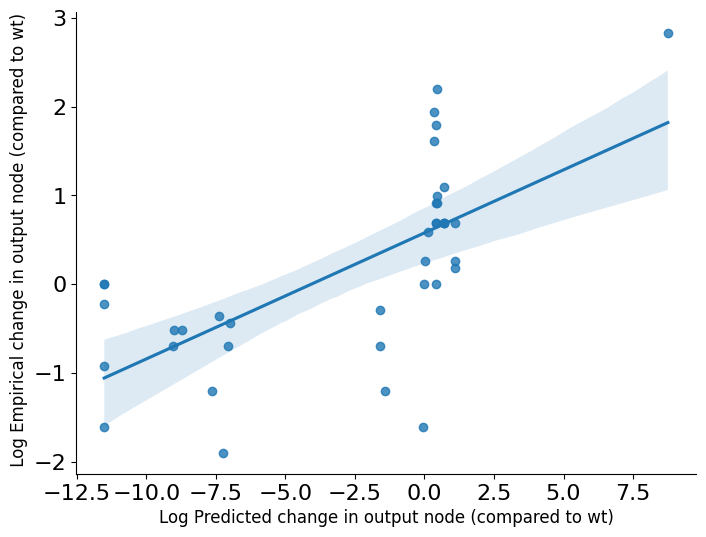

In [32]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.regplot(x='log Predicted degree multiplier',y='log Empirical degree multiplier',data = df_pred_scores)#,scatter_kws={'facecolors':df_pred_scores['color']})
plt.ylabel(' Log Empirical change in output node (compared to wt)',fontsize = 12)
plt.xlabel('Log Predicted change in output node (compared to wt)',fontsize = 12)
sns.despine()
plt.savefig('figures/FigureS1.png',dpi=300)
plt.savefig('figures/FigureS1.tiff')

## Custom experiment to display (checking what's happening in an individual experiment)

In [ ]:
exp_id='epithelial_wt'
monitored_nodes = ['HHIP','miR_34','E_cadherin','SNAI1','SNAI2','Damage','ZEB1','miR_200','SNAI2','GLI','Migration']

experiments_dict[exp_id].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2)